In [29]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt

In [30]:

#df = pd.read_csv("Data/allcrypto.csv",dtype='object') #read in the csv file
#df = pd.read_csv("Data/allcrypto.csv")
df = pd.read_csv("Data/allcrypto.csv",low_memory=False,parse_dates=True)

In [31]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,4/28/2013,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,4/29/2013,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,4/30/2013,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,5/1/2013,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,5/2/2013,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32


In [32]:
df.tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
659368,entcash,ENT,ENTCash,1/6/2018,1408,0.174183,0.194897,0.150645,0.163826,3345710,0.0,0.2979,0.04
659369,entcash,ENT,ENTCash,1/7/2018,1408,0.164768,0.181707,0.163826,0.169468,2164900,0.0,0.3155,0.02
659370,entcash,ENT,ENTCash,1/8/2018,1408,0.174209,0.174209,0.144273,0.161158,1457280,0.0,0.564,0.03
659371,entcash,ENT,ENTCash,1/9/2018,1408,0.162810,0.177575,0.147691,0.156104,3480830,0.0,0.2815,0.03
659372,entcash,ENT,ENTCash,1/10/2018,1408,0.157429,0.163051,0.148058,0.150869,3718410,0.0,0.1875,0.01


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659373 entries, 0 to 659372
Data columns (total 13 columns):
slug           659373 non-null object
symbol         659373 non-null object
name           659373 non-null object
date           659373 non-null object
ranknow        659373 non-null int64
open           659373 non-null float64
high           659373 non-null float64
low            659373 non-null float64
close          659373 non-null float64
volume         659373 non-null int64
market         659373 non-null float64
close_ratio    644847 non-null object
spread         659373 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 65.4+ MB


In [34]:
# I don't need symbol because I have name already,so I will drop it
# In this analysis, it's important to work with date as date objects, so we need to transform it.
# we see from df.info, close_ratio column has either NA'S or missing values.
df1 = df.drop(['symbol'], axis=1) # axis=1 denotes that we are refering to column,not a row.
df1['date'] = pd.to_datetime(df1['date'], format= '%m/%d/%Y')
df1['close_ratio']=pd.to_numeric(df1['close_ratio'],errors='coerce')# errors=coerce puts invalid parsing to NAN.

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659373 entries, 0 to 659372
Data columns (total 12 columns):
slug           659373 non-null object
name           659373 non-null object
date           659373 non-null datetime64[ns]
ranknow        659373 non-null int64
open           659373 non-null float64
high           659373 non-null float64
low            659373 non-null float64
close          659373 non-null float64
volume         659373 non-null int64
market         659373 non-null float64
close_ratio    644844 non-null float64
spread         659373 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 60.4+ MB


In [36]:
df1.median()#only calulates for median data

ranknow          666.000000
open               0.006680
high               0.007732
low                0.005828
close              0.006700
volume           340.000000
market         75216.000000
close_ratio        0.447850
spread             0.000000
dtype: float64

In [37]:
df1_imputed=df1.fillna(df1.median())

In [38]:
df1_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659373 entries, 0 to 659372
Data columns (total 12 columns):
slug           659373 non-null object
name           659373 non-null object
date           659373 non-null datetime64[ns]
ranknow        659373 non-null int64
open           659373 non-null float64
high           659373 non-null float64
low            659373 non-null float64
close          659373 non-null float64
volume         659373 non-null int64
market         659373 non-null float64
close_ratio    659373 non-null float64
spread         659373 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 60.4+ MB


In [39]:
df1_imputed.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,659373.000000,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,659373.000000,6.593730e+05
mean,664.808072,1.954633e+02,2.390818e+02,1.582942e+02,1.952336e+02,4.024155e+06,9.494453e+07,0.471751,8.078717e+01
std,376.857132,9.339245e+03,1.215379e+04,7.104065e+03,9.297601e+03,1.419269e+08,2.653153e+09,0.337225,6.194455e+03
min,1.000000,1.000000e-10,1.300000e-10,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000,0.000000e+00
25%,362.000000,4.130000e-04,4.830000e-04,3.550000e-04,4.140000e-04,2.000000e+01,6.706000e+03,0.160800,0.000000e+00
50%,666.000000,6.680000e-03,7.732000e-03,5.828000e-03,6.700000e-03,3.400000e+02,7.521600e+04,0.447850,0.000000e+00
75%,961.000000,9.682200e-02,1.119570e-01,8.445300e-02,9.728600e-02,7.618000e+03,9.043740e+05,0.777800,2.000000e-02
max,1408.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.260000e+11,1.000000,1.770563e+06


In [40]:
df1_imputed['slug'].describe()

count       659373
unique        1400
top       litecoin
freq          1719
Name: slug, dtype: object

In [41]:
top10_rank = [1,2,3,4,5,6,7,8,9,10]
crypto_df = df1[df1_imputed["ranknow"].isin(top10_rank)]

In [42]:
crypto_df.head()

,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88
1,bitcoin,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49
2,bitcoin,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88
3,bitcoin,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17
4,bitcoin,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32


In [43]:
crypto_df.tail()

,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
10126,dash,Dash,2018-01-06,10,1157.09,1279.47,1147.49,1265.03,215058000,9.026110e+09,0.8906,131.98
10127,dash,Dash,2018-01-07,10,1266.43,1394.28,1266.43,1285.43,230576000,9.881510e+09,0.1486,127.85
10128,dash,Dash,2018-01-08,10,1283.36,1320.28,1007.55,1087.75,215239000,1.001620e+10,0.2565,312.73
10129,dash,Dash,2018-01-09,10,1085.75,1134.49,1055.21,1111.86,220569000,8.476040e+09,0.7146,79.28
10130,dash,Dash,2018-01-10,10,1115.48,1117.33,1041.39,1106.36,231944000,8.710310e+09,0.8555,75.94


In [44]:
### Data Visualization and Attribute Relationships


In [59]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import seaborn as sns


In [57]:
#we are taking single dataframe containing daily USD  close prices for the ten cryptocurrencies
crypto_df_grouped = crypto_df.groupby('name') 

ValueError: setting an array element with a sequence

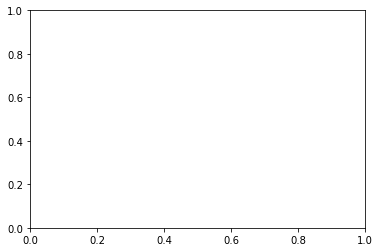

In [58]:
sns.kdeplot(crypto_df[]

0         134.21
1         144.54
2         139.00
3         116.99
4         105.21
5          97.75
6         112.50
7         115.91
8         112.30
9         111.50
10        113.57
11        112.67
12        117.20
13        115.24
14        115.00
15        117.98
16        111.50
17        114.22
18        118.76
19        123.02
20        123.50
21        121.99
22        122.00
23        122.88
24        123.89
25        126.70
26        133.20
27        131.98
28        133.48
29        129.75
          ...   
10101     932.03
10102     886.88
10103     941.11
10104     900.52
10105    1001.51
10106    1105.92
10107    1167.12
10108    1186.63
10109    1550.85
10110    1434.82
10111    1179.01
10112    1275.50
10113    1184.69
10114    1175.89
10115    1222.83
10116    1189.89
10117    1160.57
10118    1147.95
10119    1011.47
10120    1051.68
10121    1053.98
10122    1217.72
10123    1170.74
10124    1229.79
10125    1152.41
10126    1265.03
10127    1285.43
10128    1087.